# Assignment 1 MAST30034 994765 Dion Tran
### Data

In [39]:
# import
%autosave 60
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Autosaving every 60 seconds


In [2]:
# read in the data (note that this is a subsample)
df1 = pd.read_csv("data/yellow_tripdata_2020-01.csv", dtype={'RatecodeID': 'unicode'}, low_memory=False)
df2 = pd.read_csv("data/yellow_tripdata_2020-02.csv", dtype={'RatecodeID': 'unicode'}, low_memory=False)
df3 = pd.read_csv("data/yellow_tripdata_2020-03.csv", dtype={'RatecodeID': 'unicode'}, low_memory=False)

df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,2020-01-01 00:39:25,2020-01-01 00:39:29,1.0,0.00,1,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,1.0,0.00,5,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,2019-12-18 15:30:35,2019-12-18 15:31:35,4.0,0.00,1,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.70,1,N,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


In [3]:
df1.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID                object
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [4]:
# data filtering

df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)

# tips only occur with credit card and tip amounts that are positive

cc_df1 = df1[(df1['payment_type']==1) & (df1['tip_amount'] >= 0)]
cc_df2 = df2[(df2['payment_type']==1) & (df2['tip_amount'] >= 0)]
cc_df3 = df3[(df3['payment_type']==1) & (df3['tip_amount'] >= 0)]

cc_df1.shape

(4694878, 18)

In [5]:
# tip amounts
tip_amount = pd.DataFrame()
tip_amount['Jan'] = cc_df1['tip_amount']
tip_amount['Feb'] = cc_df2['tip_amount']
tip_amount['Mar'] = cc_df3['tip_amount']

tip_stats = tip_amount.describe()
tip_stats

,Jan,Feb,Mar
count,4.694878e+06,3.481150e+06,1.608126e+06
mean,2.985733e+00,2.972807e+00,2.900083e+00
std,2.828607e+00,2.704590e+00,2.784078e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+00,1.750000e+00,1.660000e+00
50%,2.320000e+00,2.350000e+00,2.260000e+00
75%,3.260000e+00,3.320000e+00,3.260000e+00
max,1.100000e+03,5.490200e+02,8.000000e+02


In [6]:
#removing outliers getting
JanQ3 = 3.26
JanIQR = JanQ3-1.7
FebQ3 = 3.32
FebIQR = FebQ3-1.75
MarQ3 = 3.26
MarIQR = MarQ3-1.66

JanO = JanQ3 + 1.5 * JanIQR
FebO = FebQ3 + 1.5 * FebIQR
MarO = MarQ3 + 1.5 * MarIQR

tip_amount_o = pd.DataFrame
tip_amount_o = tip_amount[tip_amount['Jan'] < JanO]
tip_amount_o = tip_amount[tip_amount['Feb'] < FebO]
tip_amount_o = tip_amount[tip_amount['Mar'] < MarO]

tip_amount_o

,Jan,Feb,Mar
0,1.47,2.45,2.00
2,1.00,1.00,1.95
3,1.36,3.00,1.76
7,0.00,NaN,1.30
8,0.00,1.26,2.00
...,...,...,...
2969793,1.85,NaN,2.19
2969795,1.50,5.76,2.06
2969801,2.66,2.25,2.86
2969802,1.76,3.00,2.20


In [7]:
# top ten tip counts
tip_count = pd.DataFrame()
tip_count['Jan Count'] = tip_amount_o['Jan'].value_counts()
tip_count['Feb Count'] = tip_amount_o['Feb'].value_counts()
tip_count['Mar Count'] = tip_amount_o['Mar'].value_counts()

tip_count.head(10)

,Jan Count,Feb Count,Mar Count
1.00,112673,89475.0,129638.0
2.00,73555,57471.0,84416.0
0.00,46500,32278.0,56372.0
2.06,30128,22275.0,30718.0
1.96,29974,21696.0,30458.0
2.16,29053,21391.0,29842.0
1.86,28601,20863.0,29353.0
2.26,28066,20665.0,28609.0
1.50,27577,21550.0,30642.0
1.76,26184,19236.0,26756.0


In [8]:
# top ten tip counts in percentages
tip_pcts = tip_count.apply(lambda x:
                           100 * x / float(x.sum())).rename(columns={'Jan Count': 'Jan %Count',
                                                                     'Feb Count': 'Feb %Count',
                                                                     'Mar Count': 'Mar %Count'})
tip_pcts.head(10)

,Jan %Count,Feb %Count,Mar %Count
1.00,7.605122,7.931738,8.750219
2.00,4.964763,5.094662,5.697855
0.00,3.138624,2.861365,3.804960
2.06,2.033558,1.974624,2.073383
1.96,2.023164,1.923297,2.055834
2.16,1.960999,1.896259,2.014255
1.86,1.930490,1.849453,1.981249
2.26,1.894379,1.831901,1.931031
1.50,1.861373,1.910354,2.068253
1.76,1.767349,1.705224,1.805959


In [9]:
# keeping outliers in main dataset
cc_df1 = cc_df1[cc_df1['tip_amount'] <= JanO]
cc_df2 = cc_df2[cc_df2['tip_amount'] <= FebO]
cc_df3 = cc_df3[cc_df3['tip_amount'] <= MarO]

cc_df1.shape

(4281459, 18)

### Tip Amounts at different Times

In [10]:
#getting days
cc_df1.loc[:,'day']=pd.DatetimeIndex(cc_df1['tpep_pickup_datetime']).weekday
cc_df2.loc[:,'day']=pd.DatetimeIndex(cc_df2['tpep_pickup_datetime']).weekday
cc_df3.loc[:,'day']=pd.DatetimeIndex(cc_df3['tpep_pickup_datetime']).weekday

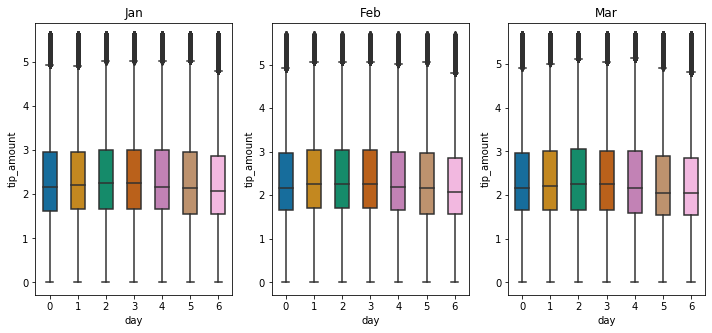

In [11]:
#boxplots
f,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(y='tip_amount', x='day', data=cc_df1, 
                    width=0.5, palette='colorblind', ax=ax1).set_title('Jan')
sns.boxplot(y='tip_amount', x='day', data=cc_df2, 
                    width=0.5, palette='colorblind', ax=ax2).set_title('Feb')
sns.boxplot(y='tip_amount', x='day', data=cc_df3, 
                    width=0.5, palette='colorblind', ax=ax3).set_title('Mar')
plt.savefig('plots/DaysTipDay.jpeg')

In [12]:
#getting hours
cc_df1.loc[:,'hour']=pd.DatetimeIndex(cc_df1['tpep_pickup_datetime']).hour
cc_df2.loc[:,'hour']=pd.DatetimeIndex(cc_df2['tpep_pickup_datetime']).hour
cc_df3.loc[:,'hour']=pd.DatetimeIndex(cc_df3['tpep_pickup_datetime']).hour

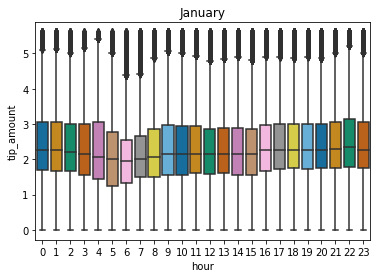

In [13]:
#January Hours
bplot = sns.boxplot(y='tip_amount', x='hour', data=cc_df1, 
                    palette='colorblind').set_title('January')
bplot.figure.savefig('plots/JanTipHour.jpeg',
                    dpi=100)

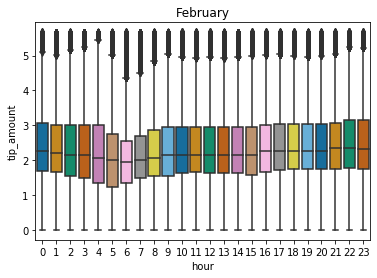

In [14]:
#February Hours
bplot = sns.boxplot(y='tip_amount', x='hour', data=cc_df2, 
                    palette='colorblind').set_title('February')
bplot.figure.savefig('plots/FebTipHour.jpeg',
                    dpi=100)

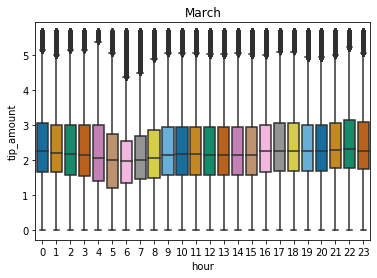

In [15]:
#March Hours
bplot = sns.boxplot(y='tip_amount', x='hour', data=cc_df3, 
                    palette='colorblind').set_title('March')
bplot.figure.savefig('plots/MarTipHour.jpeg',
                    dpi=100)

### Correlation

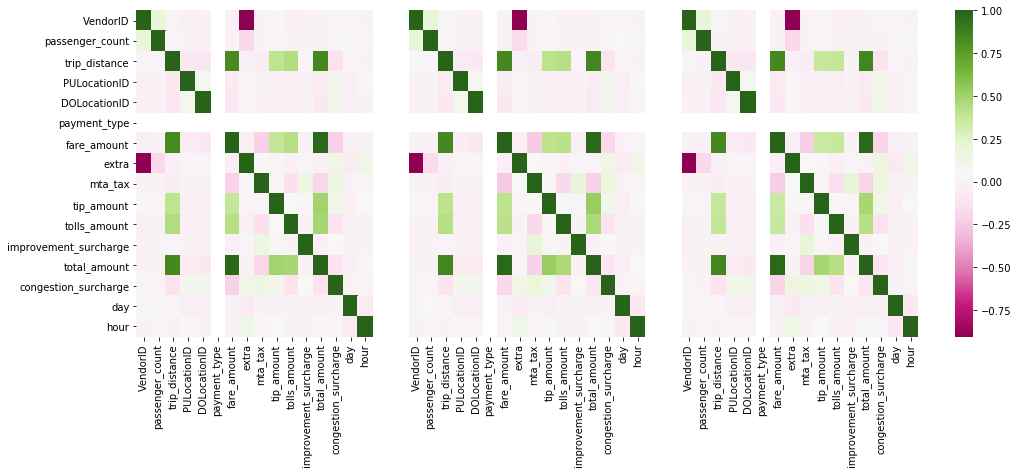

In [26]:
#pearson correlation heatmap
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, 
            gridspec_kw={'width_ratios':[1,1,1,0.08]}, figsize=(15, 6))
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(cc_df1.corr(), cmap='PiYG', cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(cc_df2.corr(), cmap='PiYG',cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(cc_df3.corr(), cmap='PiYG',ax=ax3, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
plt.savefig('plots/correlation.png')
plt.show()

In [27]:
# pearson (by default) correlation table for distance and fare amount
Cor = pd.DataFrame()

Cor['Jan'] = cc_df1[['tip_amount', 'trip_distance','fare_amount',
        'tolls_amount', 'total_amount']].corr(method='pearson')['tip_amount']

Cor['Feb'] = cc_df2[['tip_amount', 'trip_distance','fare_amount',
        'tolls_amount', 'total_amount']].corr(method='pearson')['tip_amount']

Cor['Mar'] = cc_df3[['tip_amount', 'trip_distance','fare_amount',
        'tolls_amount', 'total_amount']].corr(method='pearson')['tip_amount']

Cor

,Jan,Feb,Mar
tip_amount,1.000000,1.000000,1.000000
trip_distance,0.398904,0.407115,0.371441
fare_amount,0.377301,0.403304,0.359412
tolls_amount,0.049770,0.051011,0.030582
total_amount,0.499427,0.525404,0.485777


### Chloropleth Geospatial Maps

In [28]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# sf stands for shape file
sf = gpd.read_file("sph/taxi_zones.shp")
zone = pd.read_csv("sph/taxi+_zone_lookup.csv")

# Convert geometry to long/lat 
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

In [29]:
gdf1 = gpd.GeoDataFrame(pd.merge(cc_df1, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)
gdf2 = gpd.GeoDataFrame(pd.merge(cc_df2, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)
gdf3 = gpd.GeoDataFrame(pd.merge(cc_df3, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)

geoJSON1 = gdf1[['LocationID','geometry']].drop_duplicates('LocationID').to_json()
geoJSON2 = gdf2[['LocationID','geometry']].drop_duplicates('LocationID').to_json()
geoJSON3 = gdf3[['LocationID','geometry']].drop_duplicates('LocationID').to_json()

In [ ]:
#Pickup January
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON1,
    name='PickUp',
    data=cc_df1,
    columns=['PULocationID', 'tip_amount'],
    key_on = 'properties.LocationID',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Pickup January'
).add_to(m)

folium.LayerControl().add_to(m)
m.save('plots/foliumChoroplethMap1PU.html')
m

In [ ]:
#Dropoff January
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON1,
    name='DropOff',
    data=cc_df1,
    columns=['DOLocationID', 'tip_amount'],
    key_on = 'properties.LocationID',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Dropoff January'
).add_to(m)

folium.LayerControl().add_to(m)
m.save('plots/foliumChoroplethMap1DO.html')
m

In [ ]:
#Pickup February
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON2,
    name='PickUp2',
    data=cc_df2,
    columns=['PULocationID', 'tip_amount'],
    key_on = 'properties.LocationID',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Pickup February'
).add_to(m)

folium.LayerControl().add_to(m)
m.save('plots/foliumChoroplethMap2PU.html')
m

In [ ]:
#Dropoff February
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON2,
    name='DropOff2',
    data=cc_df2,
    columns=['DOLocationID', 'tip_amount'],
    key_on = 'properties.LocationID',
    fill_color='RdPu',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Dropoff February'
).add_to(m)

folium.LayerControl().add_to(m)
m.save('plots/foliumChoroplethMap2DO.html')
m

In [ ]:
#Pickup March
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON3,
    name='PickUp3',
    data=cc_df3,
    columns=['PULocationID', 'tip_amount'],
    key_on = 'properties.LocationID',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Pickup March'
).add_to(m)

folium.LayerControl().add_to(m)
m.save('plots/foliumChoroplethMap3PU.html')
m

In [ ]:
#Dropoff March
m = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)

folium.Choropleth(
    geo_data=geoJSON3,
    name='DropOff3',
    data=cc_df3,
    columns=['DOLocationID', 'tip_amount'],
    key_on = 'properties.LocationID',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name='Dropoff March'
).add_to(m)

folium.LayerControl().add_to(m)
m.save('plots/foliumChoroplethMap3PO.html')
m